# HW 09 Prject 02 - Data Wrangling and Exploration using Pandas

Ziying Wang

Import Libs and Load dataset

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
df = pd.read_csv("chronic-disease-data.csv")
df

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
3,State,Alabama,1.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0147,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32335,State,Wyoming,56.0,<65,Race,non-Hispanic Black,Stroke,NaN,NaN,NaN,NaN,NaN
32336,State,Wyoming,56.0,All,Race,non-Hispanic Black,Stroke,0.0358,NaN,NaN,NaN,NaN
32337,State,Wyoming,56.0,65+,Race,non-Hispanic White,Stroke,0.0218,NaN,NaN,NaN,NaN
32338,State,Wyoming,56.0,<65,Race,non-Hispanic White,Stroke,0.0150,NaN,NaN,NaN,NaN


Check dataframe shape

In [148]:
df.shape

(32340, 12)

Check unique counts for each condition

In [149]:
df.Bene_Cond.value_counts()

Alcohol Abuse                                  1540
Drug/Substance Abuse                           1540
Schizophrenia and Other Psychotic Disorders    1540
Osteoporosis                                   1540
Ischemic Heart Disease                         1540
Hypertension                                   1540
Hyperlipidemia                                 1540
Hepatitis (Chronic Viral B & C)                1540
Heart Failure                                  1540
HIV/AIDS                                       1540
Diabetes                                       1540
Alzheimer's Disease/Dementia                   1540
Depression                                     1540
Chronic Kidney Disease                         1540
Cancer                                         1540
COPD                                           1540
Autism Spectrum Disorders                      1540
Atrial Fibrillation                            1540
Asthma                                         1540
Arthritis   

## Question 1: Snapshot of prevalence of chronic conditions stratified by age and race

Filter out data for national, texas, new york, california, and florida. Then stratify by race:

In [150]:
df_national_states = df[df['Bene_Geo_Desc'].isin(['National', 'Texas', 'New York', 'California', 'Florida'])]
df_national_states_race = df_national_states[df_national_states['Bene_Demo_Lvl'].isin(['Race'])]
df_national_states_race

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
16275,State,California,6.0,65+,Race,Asian Pacific Islander,Alcohol Abuse,0.0052,NaN,NaN,NaN,NaN
16276,State,California,6.0,<65,Race,Asian Pacific Islander,Alcohol Abuse,0.0221,NaN,NaN,NaN,NaN
16277,State,California,6.0,All,Race,Asian Pacific Islander,Alcohol Abuse,0.0067,NaN,NaN,NaN,NaN
16278,State,California,6.0,65+,Race,Hispanic,Alcohol Abuse,0.0162,NaN,NaN,NaN,NaN
16279,State,California,6.0,<65,Race,Hispanic,Alcohol Abuse,0.0445,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29500,State,Texas,48.0,<65,Race,non-Hispanic Black,Stroke,0.0448,NaN,NaN,NaN,NaN
29501,State,Texas,48.0,All,Race,non-Hispanic Black,Stroke,0.0553,NaN,NaN,NaN,NaN
29502,State,Texas,48.0,65+,Race,non-Hispanic White,Stroke,0.0429,NaN,NaN,NaN,NaN
29503,State,Texas,48.0,<65,Race,non-Hispanic White,Stroke,0.0321,NaN,NaN,NaN,NaN


Seperate by three different age groups:

In [151]:
# for each age group, sort by race and drop useless columns

df_national_states_race_age_65p = df_national_states_race[df_national_states_race['Bene_Age_Lvl'].isin(['65+'])]
df_national_states_race_age_65p.sort_values(by=['Bene_Cond', 'Bene_Demo_Desc'])
df_national_states_race_age_65p.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)

df_national_states_race_age_65l = df_national_states_race[df_national_states_race['Bene_Age_Lvl'].isin(['<65'])]
df_national_states_race_age_65l.sort_values(by=['Bene_Cond', 'Bene_Demo_Desc'])
df_national_states_race_age_65l.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)

df_national_states_race_age_all = df_national_states_race[df_national_states_race['Bene_Age_Lvl'].isin(['All'])]
df_national_states_race_age_all.sort_values(by=['Bene_Cond', 'Bene_Demo_Desc'])
df_national_states_race_age_all.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)

/var/folders/sd/l5t5fc456wx8wmm52396n0c80000gp/T/ipykernel_2828/3997210433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_national_states_race_age_65p.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)
/var/folders/sd/l5t5fc456wx8wmm52396n0c80000gp/T/ipykernel_2828/3997210433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_national_states_race_age_65l.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)
/var/folders/sd/l5t5fc456wx8wmm52396n0c80000gp/T/ipykern

In [152]:
df_national_states_race_age_65p.Bene_Geo_Desc.value_counts()

California    105
Florida       105
National      105
New York      105
Texas         105
Name: Bene_Geo_Desc, dtype: int64

For each age group, stratify each state:

In [153]:
# for each age group get data for each state/national

cali = df_national_states_race_age_65p[df_national_states_race_age_65p['Bene_Geo_Desc'].isin(['California'])]
flo = df_national_states_race_age_65p[df_national_states_race_age_65p['Bene_Geo_Desc'].isin(['Florida'])]
nation = df_national_states_race_age_65p[df_national_states_race_age_65p['Bene_Geo_Desc'].isin(['National'])]
ny = df_national_states_race_age_65p[df_national_states_race_age_65p['Bene_Geo_Desc'].isin(['New York'])]
tx = df_national_states_race_age_65p[df_national_states_race_age_65p['Bene_Geo_Desc'].isin(['Texas'])]

cali2 = df_national_states_race_age_65l[df_national_states_race_age_65l['Bene_Geo_Desc'].isin(['California'])]
flo2 = df_national_states_race_age_65l[df_national_states_race_age_65l['Bene_Geo_Desc'].isin(['Florida'])]
nation2 = df_national_states_race_age_65l[df_national_states_race_age_65l['Bene_Geo_Desc'].isin(['National'])]
ny2 = df_national_states_race_age_65l[df_national_states_race_age_65l['Bene_Geo_Desc'].isin(['New York'])]
tx2 = df_national_states_race_age_65l[df_national_states_race_age_65l['Bene_Geo_Desc'].isin(['Texas'])]

cali3 = df_national_states_race_age_all[df_national_states_race_age_all['Bene_Geo_Desc'].isin(['California'])]
flo3 = df_national_states_race_age_all[df_national_states_race_age_all['Bene_Geo_Desc'].isin(['Florida'])]
nation3 = df_national_states_race_age_all[df_national_states_race_age_all['Bene_Geo_Desc'].isin(['National'])]
ny3 = df_national_states_race_age_all[df_national_states_race_age_all['Bene_Geo_Desc'].isin(['New York'])]
tx3 = df_national_states_race_age_all[df_national_states_race_age_all['Bene_Geo_Desc'].isin(['Texas'])]

Compute the average prevalence value for each state in each age group:

In [154]:
cali_list = cali.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
flo_list = flo.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
nation_list = nation.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
ny_list = ny.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
tx_list = tx.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()

cali_list2 = cali2.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
flo_list2 = flo2.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
nation_list2 = nation2.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
ny_list2 = ny2.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
tx_list2 = tx2.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()

cali_list3 = cali3.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
flo_list3 = flo3.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
nation_list3 = nation3.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
ny_list3 = ny3.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()
tx_list3 = tx3.groupby('Bene_Demo_Desc')['Prvlnc'].mean().tolist()

Setup for visualization:

In [155]:
import numpy as np
import matplotlib.pyplot as plt
# all races
category_names = ['Asian Pacific Islander', 'Hispanic',
                  'Native American ', 'non-Hispanic Black', 'non-Hispanic White ']
#65+
results = {
    'National': nation_list,
    'California': cali_list,
    'Florida': flo_list,
    'New York': ny_list,
    'Texas': tx_list
}

#<65
results2 = {
    'National': nation_list2,
    'California': cali_list2,
    'Florida': flo_list2,
    'New York': ny_list2,
    'Texas': tx_list2
}

# All
results3 = {
    'National': nation_list3,
    'California': cali_list3,
    'Florida': flo_list3,
    'New York': ny_list3,
    'Texas': tx_list3
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax




### Plot: Average of prevalence of chronic conditions for each race in age group of 65+ within California, Florida, New York, Texas, and National

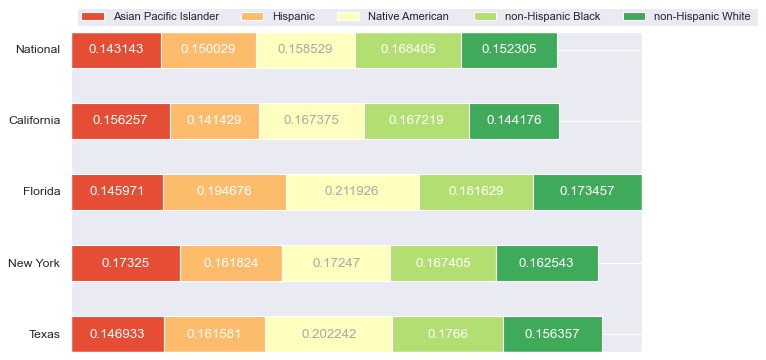

In [156]:
survey(results, category_names)
plt.show()

### Plot: Average of prevalence of chronic conditions for each race in age group of <65 within California, Florida, New York, Texas, and National

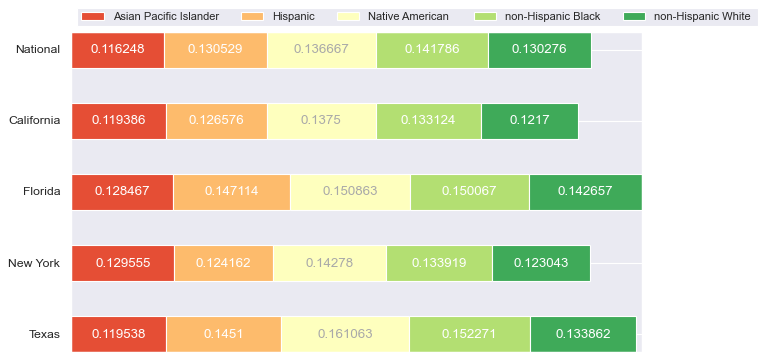

In [157]:
survey(results2, category_names)
plt.show()

### Plot: Average of prevalence of chronic conditions for each race in age group of ALL within California, Florida, New York, Texas, and National

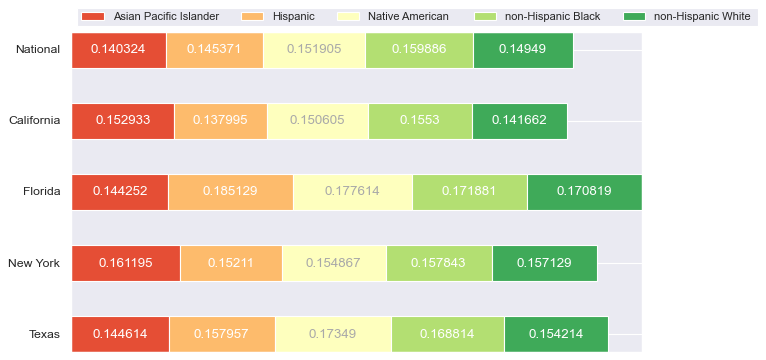

In [158]:
survey(results3, category_names)
plt.show()

## Question 2: Snapshot of utilization of Medicare for various chronic conditions

In [159]:
df_national_states_medi = df_national_states[df_national_states['Bene_Demo_Lvl'].isin(['All'])]
df_national_states_medi.drop(['Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)
df_national_states_medi.Bene_Cond.value_counts()
df_national_states_medi

/var/folders/sd/l5t5fc456wx8wmm52396n0c80000gp/T/ipykernel_2828/4259906225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_national_states_medi.drop(['Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC
1092,State,California,6.0,All,All,All,Alcohol Abuse,0.0215,25617.0342
1105,State,California,6.0,All,All,All,Alzheimer's Disease/Dementia,0.1047,25625.7932
1118,State,California,6.0,All,All,All,Arthritis,0.3118,15862.1478
1131,State,California,6.0,All,All,All,Asthma,0.0530,21031.6907
1144,State,California,6.0,All,All,All,Atrial Fibrillation,0.0749,25354.5636
...,...,...,...,...,...,...,...,...,...
12493,State,Texas,48.0,All,All,All,Hypertension,0.5987,16833.0425
12506,State,Texas,48.0,All,All,All,Ischemic Heart Disease,0.2899,22514.9430
12519,State,Texas,48.0,All,All,All,Osteoporosis,0.0682,21316.5951
12532,State,Texas,48.0,All,All,All,Schizophrenia and Other Psychotic Disorders,0.0281,27280.9992


We picked three different chronic conditions: Cancer, Stroke, and Diabetes:

In [160]:
df_national_states_medi_cond = df_national_states_medi[df_national_states_medi['Bene_Cond'].isin(['Cancer', 'Stroke', 'Diabetes'])]
df_national_states_medi_cond.sort_values(by='Bene_Cond', inplace=True)
df_national_states_medi_cond

/var/folders/sd/l5t5fc456wx8wmm52396n0c80000gp/T/ipykernel_2828/3687605436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_national_states_medi_cond.sort_values(by='Bene_Cond', inplace=True)


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC
1183,State,California,6.0,All,All,All,Cancer,0.0784,20371.3435
2548,State,Florida,12.0,All,All,All,Cancer,0.1014,21438.8783
7462,National,National,NaN,All,All,All,Cancer,0.0836,20544.2590
9100,State,New York,36.0,All,All,All,Cancer,0.0949,20734.2641
12376,State,Texas,48.0,All,All,All,Cancer,0.0760,22852.7084
1222,State,California,6.0,All,All,All,Diabetes,0.2719,16551.4968
2587,State,Florida,12.0,All,All,All,Diabetes,0.2781,18419.2973
7501,National,National,NaN,All,All,All,Diabetes,0.2695,16272.4357
9139,State,New York,36.0,All,All,All,Diabetes,0.3134,16044.0998
12415,State,Texas,48.0,All,All,All,Diabetes,0.2879,19678.6611


Get corresponding "Tot_Mdcr_Stdzd_Pymt_PC" value for each chronic condition

In [172]:
cancer = df_national_states_medi_cond[df_national_states_medi_cond['Bene_Cond'].isin(['Cancer'])]
cancer_list = cancer['Tot_Mdcr_Stdzd_Pymt_PC'].tolist()

dia = df_national_states_medi_cond[df_national_states_medi_cond['Bene_Cond'].isin(['Diabetes'])]
dia_list = dia['Tot_Mdcr_Stdzd_Pymt_PC'].tolist()

stroke = df_national_states_medi_cond[df_national_states_medi_cond['Bene_Cond'].isin(['Stroke'])]
stroke_list = stroke['Tot_Mdcr_Stdzd_Pymt_PC'].tolist()

dia_list


[16551.4968, 18419.2973, 16272.4357, 16044.0998, 19678.6611]

### Plot: Utilization of Medicare for Cancer, Diabetes, Stroke in California, Florida, New York, Texas, and National

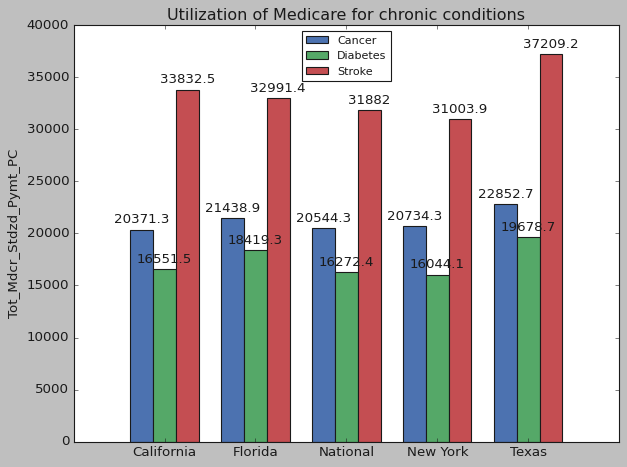

In [200]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['California', 'Florida', 'National', 'New York', 'Texas']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.25, cancer_list, width, label='Cancer', align='center')
rects2 = ax.bar(x, dia_list, width, label='Diabetes', align='center')
rects3 = ax.bar(x + 0.25, stroke_list, width, label='Stroke', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tot_Mdcr_Stdzd_Pymt_PC')
ax.set_title('Utilization of Medicare for chronic conditions')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper center')
fig.tight_layout()

plt.show()

## Question 3: Snapshot of prevalence for each chronic diseases for highest and lowest compared to national level stratified by gender and race

In [235]:
df.head()

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
3,State,Alabama,1.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0147,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN


Stratify by Gender:

In [236]:
df_sex = df[df['Bene_Demo_Lvl'].isin(['Sex'])]
df_sex_all = df_sex[df_sex['Bene_Age_Lvl'].isin(['All'])]
# df_sex.sort_values(by=['Bene_Cond', 'Bene_Demo_Desc'])
df_sex_all.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)
df_sex_all

/var/folders/sd/l5t5fc456wx8wmm52396n0c80000gp/T/ipykernel_2828/4095763542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex_all.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
9,State,Alabama,1.0,All,Sex,Female,Alcohol Abuse,0.0092
12,State,Alabama,1.0,All,Sex,Male,Alcohol Abuse,0.0306
22,State,Alabama,1.0,All,Sex,Female,Alzheimer's Disease/Dementia,0.1314
25,State,Alabama,1.0,All,Sex,Male,Alzheimer's Disease/Dementia,0.0928
35,State,Alabama,1.0,All,Sex,Female,Arthritis,0.4510
...,...,...,...,...,...,...,...,...
14988,State,Wyoming,56.0,All,Sex,Male,Osteoporosis,0.0100
14998,State,Wyoming,56.0,All,Sex,Female,Schizophrenia and Other Psychotic Disorders,0.0145
15001,State,Wyoming,56.0,All,Sex,Male,Schizophrenia and Other Psychotic Disorders,0.0164
15011,State,Wyoming,56.0,All,Sex,Female,Stroke,0.0219


#### Compute highest, lowest, and national standard values for Cancer

In [240]:
cancer_val = df_sex_all[df_sex_all['Bene_Cond'].isin(['Cancer'])]

cancer_max = cancer_val.groupby('Bene_Demo_Desc')['Prvlnc'].max()
cancer_min = cancer_val.groupby('Bene_Demo_Desc')['Prvlnc'].min()
cancer_max, cancer_min

(Bene_Demo_Desc
 Female    0.0924
 Male      0.1182
 Name: Prvlnc, dtype: float64,
 Bene_Demo_Desc
 Female    0.0485
 Male      0.0645
 Name: Prvlnc, dtype: float64)

In [242]:
cancer_val_nation = cancer_val[cancer_val['Bene_Geo_Lvl'].isin(['National'])]
cancer_val_nation

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
7471,National,National,NaN,All,Sex,Female,Cancer,0.0771
7474,National,National,NaN,All,Sex,Male,Cancer,0.0915


#### Compute highest, lowest, and national standard values for Diabetes

In [244]:
dia_val = df_sex_all[df_sex_all['Bene_Cond'].isin(['Diabetes'])]

dia_max = dia_val.groupby('Bene_Demo_Desc')['Prvlnc'].max()
dia_min = dia_val.groupby('Bene_Demo_Desc')['Prvlnc'].min()
dia_val_nation = dia_val[dia_val['Bene_Geo_Lvl'].isin(['National'])]
dia_max, dia_min, dia_val_nation


(Bene_Demo_Desc
 Female    0.4891
 Male      0.4338
 Name: Prvlnc, dtype: float64,
 Bene_Demo_Desc
 Female    0.1694
 Male      0.1982
 Name: Prvlnc, dtype: float64,
      Bene_Geo_Lvl Bene_Geo_Desc  Bene_Geo_Cd Bene_Age_Lvl Bene_Demo_Lvl  \
 7510     National      National          NaN          All           Sex   
 7513     National      National          NaN          All           Sex   
 
      Bene_Demo_Desc Bene_Cond  Prvlnc  
 7510         Female  Diabetes  0.2546  
 7513           Male  Diabetes  0.2875  )

#### Compute highest, lowest, and national standard values for Stroke

In [246]:
stroke_val = df_sex_all[df_sex_all['Bene_Cond'].isin(['Stroke'])]

stroke_max = stroke_val.groupby('Bene_Demo_Desc')['Prvlnc'].max()
stroke_min = stroke_val.groupby('Bene_Demo_Desc')['Prvlnc'].min()
stroke_val_nation = stroke_val[stroke_val['Bene_Geo_Lvl'].isin(['National'])]
stroke_max, stroke_min, stroke_val_nation

(Bene_Demo_Desc
 Female    0.0479
 Male      0.0515
 Name: Prvlnc, dtype: float64,
 Bene_Demo_Desc
 Female    0.0219
 Male      0.0200
 Name: Prvlnc, dtype: float64,
      Bene_Geo_Lvl Bene_Geo_Desc  Bene_Geo_Cd Bene_Age_Lvl Bene_Demo_Lvl  \
 7640     National      National          NaN          All           Sex   
 7643     National      National          NaN          All           Sex   
 
      Bene_Demo_Desc Bene_Cond  Prvlnc  
 7640         Female    Stroke  0.0374  
 7643           Male    Stroke  0.0380  )

### Plot: Highest, lowest, and national prevalence for each chronic condition stratified by female

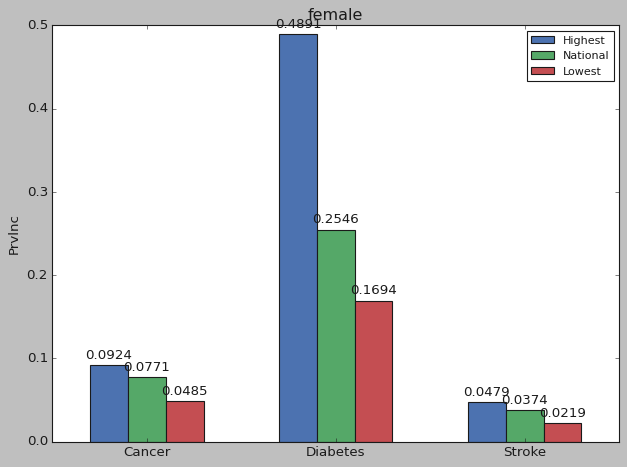

In [252]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['Cancer', 'Diabetes', 'Stroke']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

high_list = [0.0924, 0.4891, 0.0479]
nation_list = [0.0771, 0.2546, 0.0374]
low_list = [0.0485, 0.1694, 0.0219]

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, high_list, width, label='Highest', align='center')
rects2 = ax.bar(x, nation_list, width, label='National', align='center')
rects3 = ax.bar(x + 0.2, low_list, width, label='Lowest', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prvlnc')
ax.set_title('female')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper right')
fig.tight_layout()

plt.show()

### Plot: Highest, lowest, and national prevalence for each chronic condition stratified by male

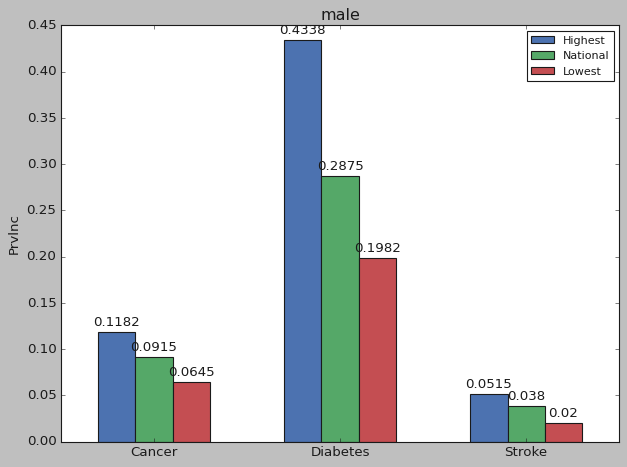

In [251]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['Cancer', 'Diabetes', 'Stroke']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

high_list = [0.1182, 0.4338, 0.0515]
nation_list = [0.0915, 0.2875, 0.0380]
low_list = [0.0645, 0.1982, 0.0200]

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, high_list, width, label='Highest', align='center')
rects2 = ax.bar(x, nation_list, width, label='National', align='center')
rects3 = ax.bar(x + 0.2, low_list, width, label='Lowest', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prvlnc')
ax.set_title('male')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper right')
fig.tight_layout()

plt.show()

Stratify by Race:

In [253]:
df_race = df[df['Bene_Demo_Lvl'].isin(['Race'])]
df_race_all = df_race[df_race['Bene_Age_Lvl'].isin(['All'])]
# df_sex.sort_values(by=['Bene_Cond', 'Bene_Demo_Desc'])
df_race_all.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)
df_race_all

/var/folders/sd/l5t5fc456wx8wmm52396n0c80000gp/T/ipykernel_2828/3773895291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race_all.drop(['Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes'], axis = 1, inplace=True)


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
15017,State,Alabama,1.0,All,Race,Asian Pacific Islander,Alcohol Abuse,0.0089
15020,State,Alabama,1.0,All,Race,Hispanic,Alcohol Abuse,0.0195
15023,State,Alabama,1.0,All,Race,Native American,Alcohol Abuse,0.0318
15026,State,Alabama,1.0,All,Race,non-Hispanic Black,Alcohol Abuse,0.0265
15029,State,Alabama,1.0,All,Race,non-Hispanic White,Alcohol Abuse,0.0170
...,...,...,...,...,...,...,...,...
32327,State,Wyoming,56.0,All,Race,Asian Pacific Islander,Stroke,NaN
32330,State,Wyoming,56.0,All,Race,Hispanic,Stroke,0.0243
32333,State,Wyoming,56.0,All,Race,Native American,Stroke,0.0178
32336,State,Wyoming,56.0,All,Race,non-Hispanic Black,Stroke,0.0358


#### Compute highest, lowest, and national standard values for Cancer

In [257]:
cancer_val = df_race_all[df_race_all['Bene_Cond'].isin(['Cancer'])]

cancer_max = cancer_val.groupby('Bene_Demo_Desc')['Prvlnc'].max()
cancer_min = cancer_val.groupby('Bene_Demo_Desc')['Prvlnc'].min()
cancer_val_nation = cancer_val[cancer_val['Bene_Geo_Lvl'].isin(['National'])]
cancer_max, cancer_min, cancer_val_nation

(Bene_Demo_Desc
 Asian Pacific Islander    0.0891
 Hispanic                  0.0791
 Native American           0.0784
 non-Hispanic Black        0.0975
 non-Hispanic White        0.1058
 Name: Prvlnc, dtype: float64,
 Bene_Demo_Desc
 Asian Pacific Islander    0.0000
 Hispanic                  0.0315
 Native American           0.0000
 non-Hispanic Black        0.0392
 non-Hispanic White        0.0664
 Name: Prvlnc, dtype: float64,
       Bene_Geo_Lvl Bene_Geo_Desc  Bene_Geo_Cd Bene_Age_Lvl Bene_Demo_Lvl  \
 23627     National      National          NaN          All          Race   
 23630     National      National          NaN          All          Race   
 23633     National      National          NaN          All          Race   
 23636     National      National          NaN          All          Race   
 23639     National      National          NaN          All          Race   
 
                Bene_Demo_Desc Bene_Cond  Prvlnc  
 23627  Asian Pacific Islander    Cancer  0.0602  


#### Compute highest, lowest, and national standard values for Diabetes

In [259]:
dia_val = df_race_all[df_race_all['Bene_Cond'].isin(['Diabetes'])]

dia_max = dia_val.groupby('Bene_Demo_Desc')['Prvlnc'].max()
dia_min = dia_val.groupby('Bene_Demo_Desc')['Prvlnc'].min()
dia_val_nation = dia_val[dia_val['Bene_Geo_Lvl'].isin(['National'])]
dia_max, dia_min, dia_val_nation

(Bene_Demo_Desc
 Asian Pacific Islander    0.4401
 Hispanic                  0.4646
 Native American           0.5936
 non-Hispanic Black        0.5185
 non-Hispanic White        0.3971
 Name: Prvlnc, dtype: float64,
 Bene_Demo_Desc
 Asian Pacific Islander    0.2357
 Hispanic                  0.1972
 Native American           0.1942
 non-Hispanic Black        0.2404
 non-Hispanic White        0.1312
 Name: Prvlnc, dtype: float64,
       Bene_Geo_Lvl Bene_Geo_Desc  Bene_Geo_Cd Bene_Age_Lvl Bene_Demo_Lvl  \
 23672     National      National          NaN          All          Race   
 23675     National      National          NaN          All          Race   
 23678     National      National          NaN          All          Race   
 23681     National      National          NaN          All          Race   
 23684     National      National          NaN          All          Race   
 
                Bene_Demo_Desc Bene_Cond  Prvlnc  
 23672  Asian Pacific Islander  Diabetes  0.3651  


#### Compute highest, lowest, and national standard values for Stroke

In [260]:
stroke_val = df_race_all[df_race_all['Bene_Cond'].isin(['Stroke'])]

stroke_max = stroke_val.groupby('Bene_Demo_Desc')['Prvlnc'].max()
stroke_min = stroke_val.groupby('Bene_Demo_Desc')['Prvlnc'].min()
stroke_val_nation = stroke_val[stroke_val['Bene_Geo_Lvl'].isin(['National'])]
stroke_max, stroke_min, stroke_val_nation

(Bene_Demo_Desc
 Asian Pacific Islander    0.0459
 Hispanic                  0.0489
 Native American           0.0740
 non-Hispanic Black        0.0658
 non-Hispanic White        0.0483
 Name: Prvlnc, dtype: float64,
 Bene_Demo_Desc
 Asian Pacific Islander    0.0000
 Hispanic                  0.0161
 Native American           0.0000
 non-Hispanic Black        0.0000
 non-Hispanic White        0.0201
 Name: Prvlnc, dtype: float64,
       Bene_Geo_Lvl Bene_Geo_Desc  Bene_Geo_Cd Bene_Age_Lvl Bene_Demo_Lvl  \
 23822     National      National          NaN          All          Race   
 23825     National      National          NaN          All          Race   
 23828     National      National          NaN          All          Race   
 23831     National      National          NaN          All          Race   
 23834     National      National          NaN          All          Race   
 
                Bene_Demo_Desc Bene_Cond  Prvlnc  
 23822  Asian Pacific Islander    Stroke  0.0343  


### Plot: Highest, lowest, and national prevalence for each chronic condition stratified by Asian Pacific Islander

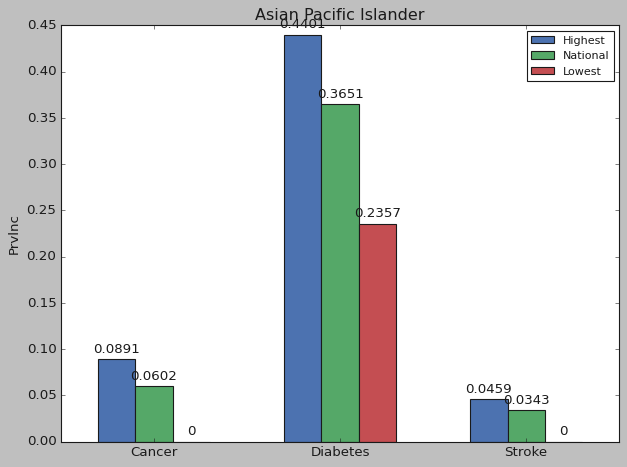

In [261]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['Cancer', 'Diabetes', 'Stroke']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

high_list = [0.0891, 0.4401, 0.0459]
nation_list = [0.0602, 0.3651, 0.0343]
low_list = [0.0000, 0.2357, 0.0000]

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, high_list, width, label='Highest', align='center')
rects2 = ax.bar(x, nation_list, width, label='National', align='center')
rects3 = ax.bar(x + 0.2, low_list, width, label='Lowest', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prvlnc')
ax.set_title('Asian Pacific Islander')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper right')
fig.tight_layout()

plt.show()

### Plot: Highest, lowest, and national prevalence for each chronic condition stratified by Hispanic

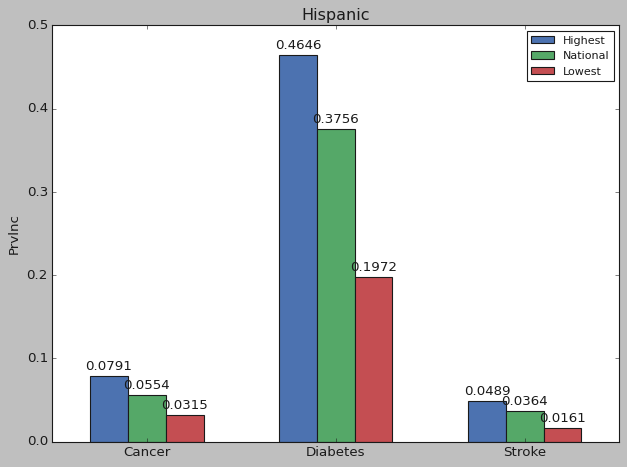

In [262]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['Cancer', 'Diabetes', 'Stroke']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

high_list = [0.0791, 0.4646, 0.0489]
nation_list = [0.0554, 0.3756, 0.0364]
low_list = [0.0315, 0.1972, 0.0161]

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, high_list, width, label='Highest', align='center')
rects2 = ax.bar(x, nation_list, width, label='National', align='center')
rects3 = ax.bar(x + 0.2, low_list, width, label='Lowest', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prvlnc')
ax.set_title('Hispanic')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper right')
fig.tight_layout()

plt.show()

### Plot: Highest, lowest, and national prevalence for each chronic condition stratified by Native American

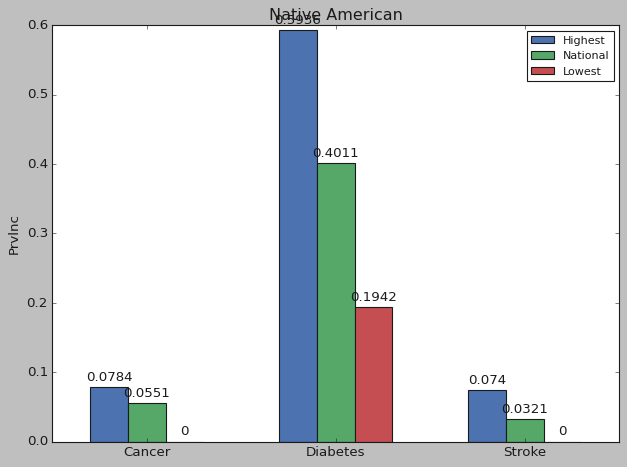

In [263]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['Cancer', 'Diabetes', 'Stroke']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

high_list = [0.0784, 0.5936, 0.0740]
nation_list = [0.0551, 0.4011, 0.0321]
low_list = [0.0000, 0.1942, 0.0000]

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, high_list, width, label='Highest', align='center')
rects2 = ax.bar(x, nation_list, width, label='National', align='center')
rects3 = ax.bar(x + 0.2, low_list, width, label='Lowest', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prvlnc')
ax.set_title('Native American')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper right')
fig.tight_layout()

plt.show()

### Plot: Highest, lowest, and national prevalence for each chronic condition stratified by Non-Hispanic Black

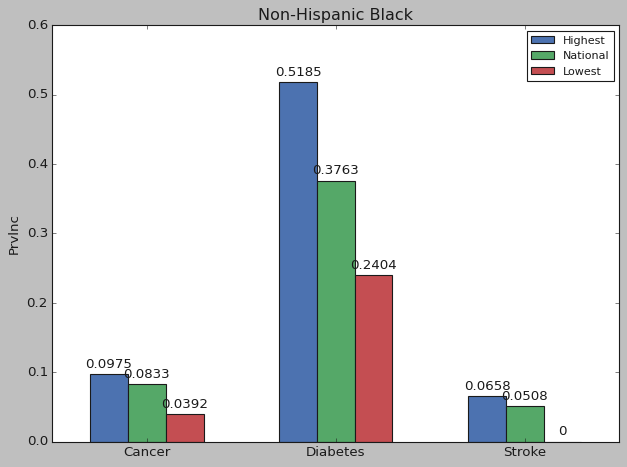

In [264]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['Cancer', 'Diabetes', 'Stroke']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

high_list = [0.0975, 0.5185, 0.0658]
nation_list = [0.0833, 0.3763, 0.0508]
low_list = [0.0392, 0.2404, 0.0000]

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, high_list, width, label='Highest', align='center')
rects2 = ax.bar(x, nation_list, width, label='National', align='center')
rects3 = ax.bar(x + 0.2, low_list, width, label='Lowest', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prvlnc')
ax.set_title('Non-Hispanic Black')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper right')
fig.tight_layout()

plt.show()

### Plot: Highest, lowest, and national prevalence for each chronic condition stratified by Non-Hispanic White

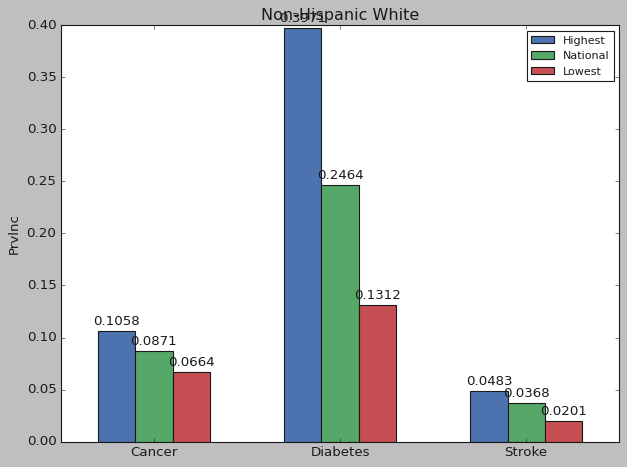

In [265]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

labels = ['Cancer', 'Diabetes', 'Stroke']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

high_list = [0.1058, 0.3971, 0.0483]
nation_list = [0.0871, 0.2464, 0.0368]
low_list = [0.0664, 0.1312, 0.0201]

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, high_list, width, label='Highest', align='center')
rects2 = ax.bar(x, nation_list, width, label='National', align='center')
rects3 = ax.bar(x + 0.2, low_list, width, label='Lowest', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prvlnc')
ax.set_title('Non-Hispanic White')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.legend(fontsize = 10, loc='upper right')
fig.tight_layout()

plt.show()